# Imports and Load Data

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import tokenize
import string

ndf = pd.read_csv('philosophy_data.csv')

# Exploratory Data Analysis

In [3]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360808 entries, 0 to 360807
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   title                      360808 non-null  object
 1   author                     360808 non-null  object
 2   school                     360808 non-null  object
 3   sentence_spacy             360808 non-null  object
 4   sentence_str               360808 non-null  object
 5   original_publication_date  360808 non-null  int64 
 6   corpus_edition_date        360808 non-null  int64 
 7   sentence_length            360808 non-null  int64 
 8   sentence_lowered           360808 non-null  object
 9   tokenized_txt              360808 non-null  object
 10  lemmatized_str             360808 non-null  object
dtypes: int64(3), object(8)
memory usage: 30.3+ MB


In [91]:
ndf.head()

,title,author,school,sentence_spacy,sentence_str,original_publication_date,corpus_edition_date,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str
0,Plato - Complete Works,Plato,plato,"What's new, Socrates, to make you leave your ...","What's new, Socrates, to make you leave your ...",-350,1997,125,"what's new, socrates, to make you leave your ...","['what', 'new', 'socrates', 'to', 'make', 'you...","what be new , Socrates , to make -PRON- lea..."
1,Plato - Complete Works,Plato,plato,Surely you are not prosecuting anyone before t...,Surely you are not prosecuting anyone before t...,-350,1997,69,surely you are not prosecuting anyone before t...,"['surely', 'you', 'are', 'not', 'prosecuting',...",surely -PRON- be not prosecute anyone before ...
2,Plato - Complete Works,Plato,plato,The Athenians do not call this a prosecution b...,The Athenians do not call this a prosecution b...,-350,1997,74,the athenians do not call this a prosecution b...,"['the', 'athenians', 'do', 'not', 'call', 'thi...",the Athenians do not call this a prosecution ...
3,Plato - Complete Works,Plato,plato,What is this you say?,What is this you say?,-350,1997,21,what is this you say?,"['what', 'is', 'this', 'you', 'say']",what be this -PRON- say ?
4,Plato - Complete Works,Plato,plato,"Someone must have indicted you, for you are no...","Someone must have indicted you, for you are no...",-350,1997,101,"someone must have indicted you, for you are no...","['someone', 'must', 'have', 'indicted', 'you',...","someone must have indict -PRON- , for -PRON- ..."


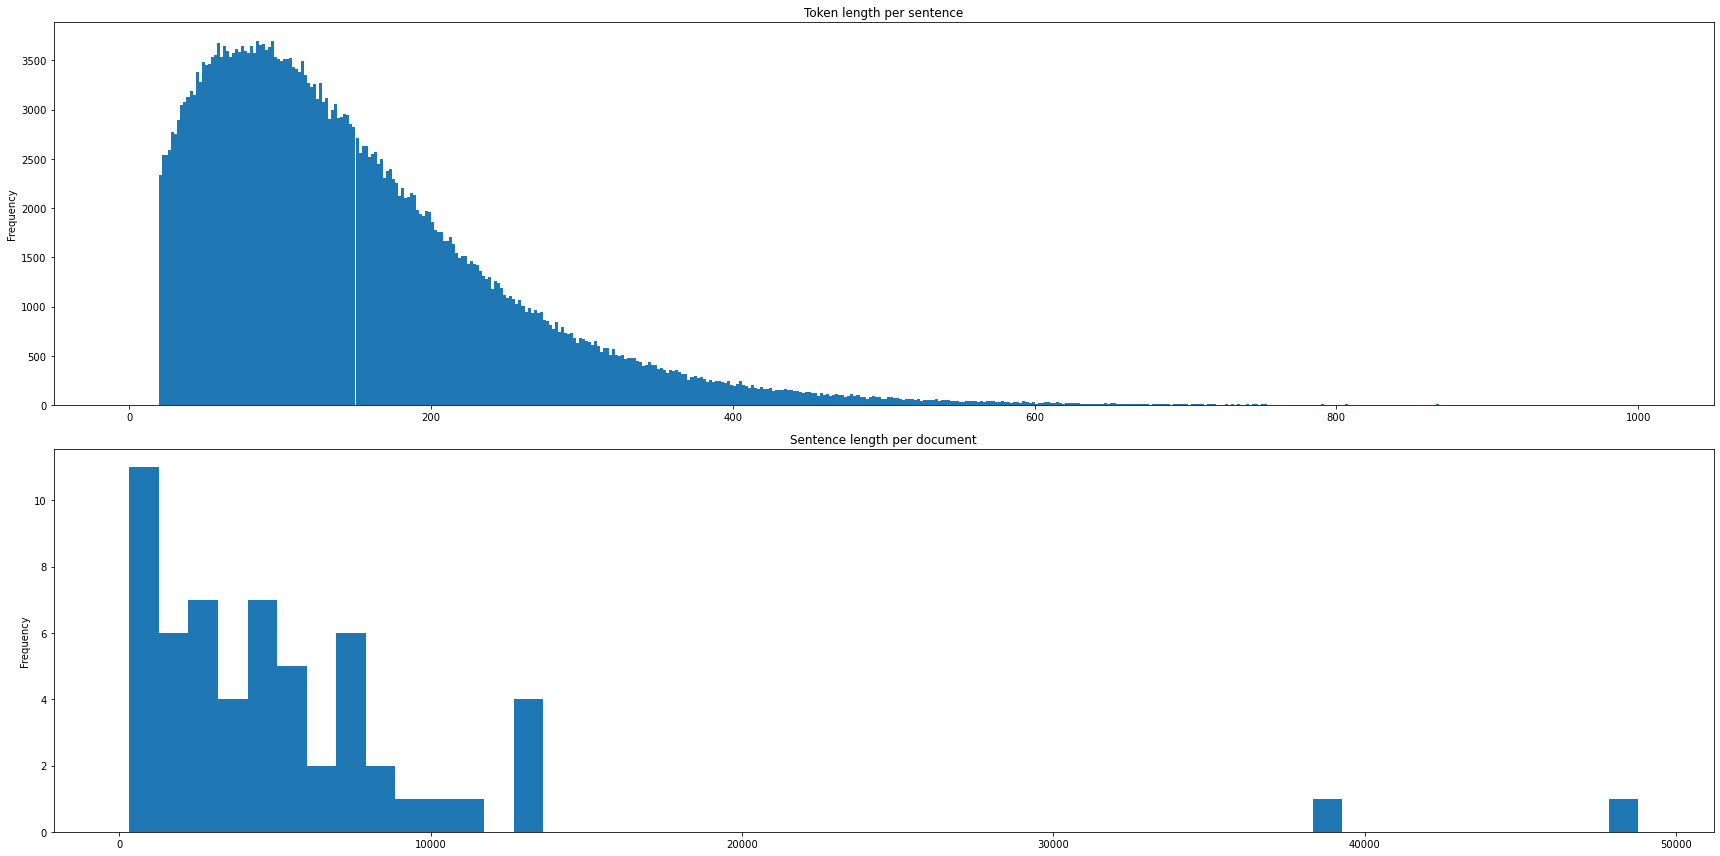

In [102]:
#to gather length of document per sentences
titles = ndf['title'].unique()

#set up superplot
fig, axes = plt.subplots(2,1, figsize=(24,12))

#first plot is the sentence distribution per word
axes[0].set_title('Token length per sentence')
ndf.sentence_length.plot(kind='hist',bins=500,range=(0,1000), ax = axes[0])
plt.plot()

#second plot is the document distribution per sentence
axes[1].set_title('Sentence length per document')
ndf.groupby(['title']).sentence_length.size().plot(kind='hist', bins=51,ax = axes[1])
plt.plot()

fig.tight_layout()
plt.show()




In [100]:
# uncomment to see the document length, per sentence, of each title
pd.DataFrame(ndf.groupby(['title','author']).sentence_length.size().sort_values(ascending=True))

,,sentence_length
title,author,
Enchiridion,Epictetus,323
Discourse On Method,Descartes,340
On The Improvement Of Understanding,Spinoza,489
The Communist Manifesto,Marx,493
Meditations On First Philosophy,Descartes,792
The Idea Of Phenomenology,Husserl,910
A Treatise Concerning The Principles Of Human Knowledge,Berkeley,1040
Second Treatise On Government,Locke,1143
The Antichrist,Nietzsche,1170


In [92]:
pd.DataFrame(ndf.groupby(by=['school','author','title']).sentence_length.mean().round(2))

sentence_length
school          author          title                                                              
analytic        Kripke          Naming And Necessity                                         120.57
                                Philosophical Troubles                                       118.60
                Lewis           Lewis - Papers                                               109.72
                Moore           Philosophical Studies                                        167.25
                Popper          The Logic Of Scientific Discovery                            139.55
                Quine           Quintessence                                                 121.64
                Russell         The Analysis Of Mind                                         142.64
                                The Problems Of Philosophy                                   154.54
                Wittgenstein    On Certainty                                                  79.38
                                Philosophical Investigations                                  83.58
                                Tractatus Logico-Philosophicus                               100.19
aristotle       Aristotle       Aristotle - Complete Works                                   153.22
capitalism      Keynes          A General Theory Of Employment, Interest, And M...           196.65
                Ricardo         On The Principles Of Political Economy And Taxa...           186.25
                Smith           The Wealth Of Nations                                        185.28
communism       Lenin           Essential Works Of Lenin                                     181.42
                Marx            Capital                                                      142.97
                                The Communist Manifesto                                      150.68
continental     Deleuze         Anti-Oedipus                                                 165.51
                                Difference And Repetition                                    161.58
                Derrida         Writing And Difference                                       143.43
                Foucault        History Of Madness                                           174.42
                                The Birth Of The Clinic                                      184.99
                                The Order Of Things                                          218.20
empiricism      Berkeley        A Treatise Concerning The Principles Of Human K...           184.72
                                Three Dialogues                                              111.98
                Hume            A Treatise Of Human Nature                                   183.01
                                Dialogues Concerning Natural Religion                        164.51
                Locke           Essay Concerning Human Understanding                         190.59
                                Second Treatise On Government                                266.79
feminism        Beauvoir        The Second Sex                                               148.79
                Davis           Women, Race, And Class                                       139.67
                Wollstonecraft  Vindication Of The Rights Of Woman                           190.96
german_idealism Fichte          The System Of Ethics                                         151.96
                Hegel           Elements Of The Philosophy Of Right                          161.01
                                Science Of Logic                                             187.17
                                The Phenomenology Of Spirit                                  168.70
                Kant            Critique Of Judgement                                        211.98
                                Critique Of Practical Reason                        

In [343]:
#replace EOS punctuation with whitespace
words = ndf.sentence_lowered.str.replace(r'[.?!\\-]', ' ')

#remove punctuation thats not at EOS
words = words.str.replace(r'[^\w\s]+', '')


words = [tokenize.word_tokenize(sentence) for sentence in words]
words = [y for x in words for y in x]


In [340]:
word_freq = pd.DataFrame(nltk.FreqDist(words).most_common(1000), columns = ['word', 'frequency'])
word_freq


,word,frequency
0,the,660399
1,of,422581
2,and,271489
3,to,260456
4,is,235111
...,...,...
995,faith,922
996,connected,920
997,ancient,917
998,movements,917


<AxesSubplot:>

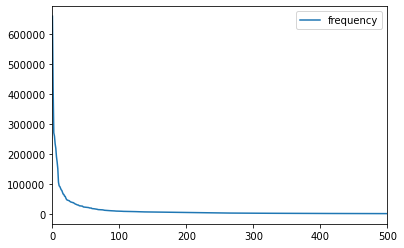

In [341]:
word_freq.plot(xlim=(0,500))